# Demography of duplicate genes

Arthur Zwaenepoel - August 2018

Assume a population of $N$ genes, residing happily in a genome. The genes duplicate at rate $\lambda$ (birth) and get lost at rate $\mu$ (death), but never such that $N < N_0$, assuming the organism needs at least a particular set of $N_0$ genes to be viable (this is the initial set of genes). We further assume that neo- or subfunctionalization leads to fixation of duplicate genes at rate $\phi$. Although this last assumption is not necessary to show the basic effects of continuous birth and death of duplicates through small-scale duplication events, it contributes some additional biological realism. Note that more sophisticated simulation studies can be found in Vanneste *et al.* (2013), where a similar model was combined with explicit simulation of synonymous sequence evolution and whole genome duplications.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
%matplotlib inline

In [5]:
def duplication_loss_simulation(N0=1000, lm=0.1, mu=0.1, t=1, ph=0.0):
    """
    Simulate the demography of duplicate genes, assuming constant birth & death rate 
    as well as a base number of genes. A rate of fixation of duplicates can also be
    specified.

    :param N0: number of base (initial, immortal) genes
    :param lm: birth (duplication) rate
    :param mu: death (loss) rate
    :param t: evolutionary time
    :param ph: fixation rate of duplicates
    :return: (duplicates, base population size, total population size) 
    """
    N = N0  # start with N0 genes
    population = []  # this stores all non-essential duplicates in the population and their age
    fixed = []  # this stores all fixed duplicates and their age
    rates = ph + mu + lm  # this is the total rate of an event happening (duplication, loss, fixation)

    # the waiting time until the first event is an exponentially distributed
    # variable with rate the sum of the rates x the number of genes
    waiting_time = rnd.expovariate((rates)*N)
    t -= waiting_time
    
    # loop until the desired time has passed
    while t > 0:    
        r = rnd.random()
        
        # fixation, inccrements N0 and moves a gene from population to fixed
        if r < ph/(rates) and N>N0:
            fixed_gene = population.pop(rnd.randrange(len(population)))
            fixed.append(fixed_gene)
            N0 += 1
            
        # duplication
        elif r < (lm+ph)/(rates):
            population.append(0.0)
            N += 1
            
        # loss 
        elif N > N0:
            population.pop(rnd.randrange(len(population)))
            N -= 1
            
        # increment age of all duplicates in the population
        for i in range(len(population)):
            population[i] += waiting_time
            
        # increment age of all fixed duplicates
        for i in range(len(fixed)):
            fixed[i] += waiting_time
            
        # draw next waiting time
        waiting_time = rnd.expovariate((rates)*N)
        t -= waiting_time
    
    return population + fixed, N, N0

## Typical case, exponential decay

A typical case, with a slightly lower loss than duplication rate and a low probability of fixtion of duplicates.

In [20]:
lm, mu, ph = 0.3, 0.25, 0.02
pop, N, N0 = duplication_loss_simulation(N0=20000, lm=lm, mu=mu, ph=ph, t=1)
N0, N, len(pop)

(20403, 21065, 1065)

/home/arzwa/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


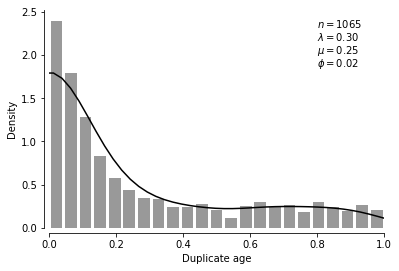

In [21]:
fig, ax = plt.subplots()

# perform KDE on the reflected data to avoid boundary effects
sns.distplot(pop + [-1*x for x in pop], hist_kws={'rwidth':0.8}, color="k")

# plot aesthetics
ax.set_xlim(0, max(pop))
ax.set_xlabel("Duplicate age")
ax.set_ylabel("Density")
ax.text(s="$n = {}$".format(len(pop)), x=0.8, y=ax.get_ylim()[1]-0.2)
ax.text(s="$\lambda = {:.2f}$".format(lm), x=0.8, y=ax.get_ylim()[1]-0.35)
ax.text(s="$\mu = {:.2f}$".format(mu), x=0.8, y=ax.get_ylim()[1]-0.5)
ax.text(s="$\phi = {:.2f}$".format(ph), x=0.8, y=ax.get_ylim()[1]-0.65)
sns.despine(offset=5)

## Less typical case

When the loss rate exceeds the duplication rate, and the fixation rate is high enough such that some duplicates get fixed before they are lost, the distribution becomes more uniform-like. 

In [54]:
lm, mu, ph = 0.3, 0.4, 0.05
pop, N, N0 = duplication_loss_simulation(N0=20000, lm=lm, mu=mu, ph=ph, t=1)
N0, N, len(pop)

(20710, 20712, 712)

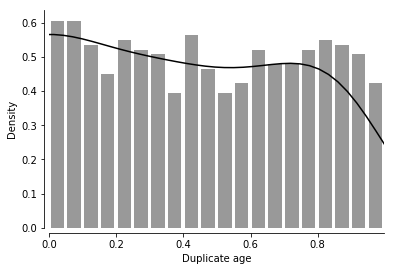

In [55]:
fig, ax = plt.subplots()

# perform KDE on the reflected data to avoid boundary effects
sns.distplot(pop + [-1*x for x in pop], hist_kws={'rwidth':0.8}, bins=40, color="k")

# plot aesthetics
ax.set_xlim(0, max(pop))
ax.set_xlabel("Duplicate age")
ax.set_ylabel("Density")
sns.despine(offset=5)